# EXPLORATORY DATA ANALYSIS

## Import of the relevant libraries

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Import of the dataset

In [31]:
df = pd.read_csv("model.csv")

## Preview of the dataset (head and shape)

In [32]:
df.head()

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0


In [33]:
df.shape

(102351, 13)

Looking for NAs

In [34]:
df.isna().sum()

id                         0
Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

there are 5091 rows with NAs in the "licence type" column

In [28]:
#eploring the licence type variable

Text(0.5, 1.0, 'Number of licences by type')

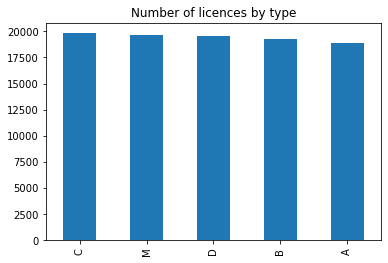

In [35]:
df.Licence_Type.value_counts().plot(kind = "bar")
plt.title("Number of licences by type")

In [36]:
df.groupby("Licence_Type").Target.value_counts(normalize = True)

Licence_Type  Target
A             0         0.680712
              1         0.319288
B             0         0.684243
              1         0.315757
C             0         0.682581
              1         0.317419
D             0         0.683686
              1         0.316314
M             0         0.682312
              1         0.317688
Name: Target, dtype: float64

Text(0.5, 1.0, 'Proportion of 0 and 1 based on licence type')

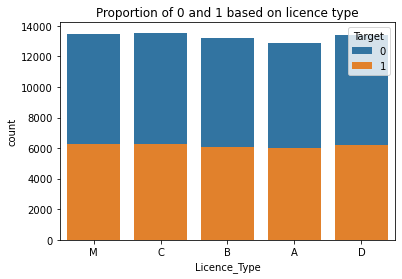

In [37]:
sns.countplot(x = df.Licence_Type, hue=df.Target, dodge=False)
plt.title("Proportion of 0 and 1 based on licence type")

the licence type variable doesn't look very relevant in predicting the outcome of the target variable. 
Knowing the type of licence doesn't add meaningful information. We decide to remove it. (In these way no NAs will be present in the dataset...all NAs were in this column)

In [10]:
#exploring the age variable

In [38]:
df.Age.describe()

count    102351.000000
mean         39.867339
std          14.935793
min          20.000000
25%          25.000000
50%          39.000000
75%          50.000000
max          85.000000
Name: Age, dtype: float64

the range seems realistic...no potential outliers identified or people with unreasonable ages.

Text(0.5, 1.0, 'Boxplot age')

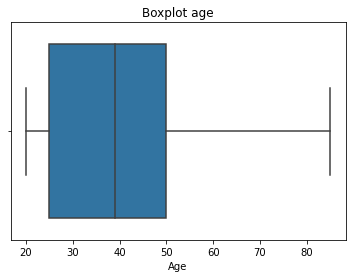

In [39]:
sns.boxplot(df.Age)
plt.title("Boxplot age")

Text(0.5, 1.0, 'Distribution of the age variable')

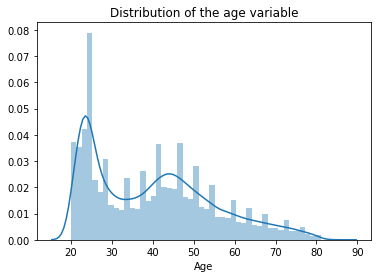

In [40]:
sns.distplot(df.Age)
plt.title("Distribution of the age variable")

Text(0.5, 1.0, 'Distribution age variable based on target outcome')

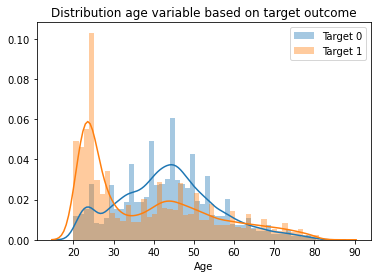

In [41]:
sns.distplot(df.loc[df.Target == 1].Age, label = "Target 0")
sns.distplot(df.loc[df.Target == 0].Age, label="Target 1")
plt.legend()
plt.title("Distribution age variable based on target outcome")

the age variable looks quite important. We can see that those with target equal to 1 tend to be younger.
The age distribution for those with target 0 and 1 respectively is different. We keep this variable

In [15]:
#exploring the annual premium variable

Text(0.5, 1.0, 'Distribution Annual Premium')

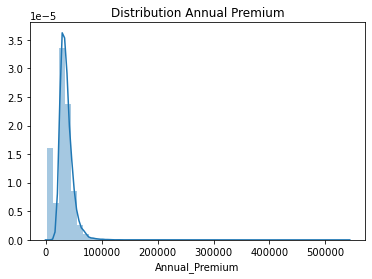

In [42]:
sns.distplot(df.Annual_Premium)
plt.title("Distribution Annual Premium")

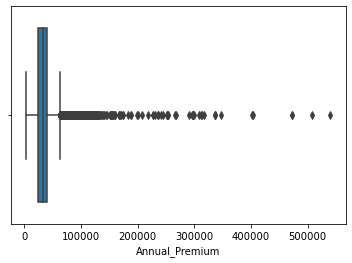

In [43]:
sns.boxplot(df.Annual_Premium)

We can identify several observations with very high values

In [44]:
len(df.loc[df.Annual_Premium >100000])

230

there are 230 observation with values greater than 100k. Without having additional information we decide to leave them and not treat them as outliers. We therefore just see these observations as realistic values within our dataset (it is reasonable that a minority of customers have such high annual premium).

Text(0.5, 1.0, 'Distribution Annual Premium by target outcome')

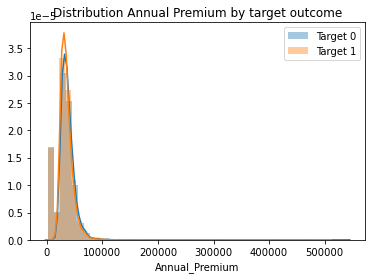

In [45]:
sns.distplot(df.loc[df.Target == 1].Annual_Premium, label = "Target 0")
sns.distplot(df.loc[df.Target == 0].Annual_Premium, label="Target 1")
plt.legend()
plt.title("Distribution Annual Premium by target outcome")

the distribution of the annual premium variable looks the same for those with target equal to 1 and 0. Still we decided to apply the logarithmic transformation to this variable to see if more meaningful information can be derived

Text(0.5, 1.0, 'Distribution Annual Premium (log scale)')

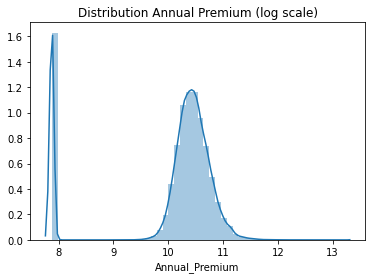

In [46]:
sns.distplot(np.log(df.Annual_Premium))
plt.title("Distribution Annual Premium (log scale)")

Text(0.5, 1.0, 'Distribution Annual Premium by target outcome (log scale)')

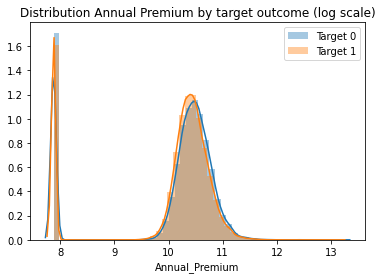

In [47]:
sns.distplot(np.log(df.loc[df.Target == 1].Annual_Premium), label = "Target 0")
sns.distplot(np.log(df.loc[df.Target == 0].Annual_Premium), label="Target 1")
plt.legend()
plt.title("Distribution Annual Premium by target outcome (log scale)")

there seems to be the same distribution for 0 and 1 taking the annual premium variable into consideration. For this reason we decide not to consider this variable

In [22]:
#exploring the seniority variable

Text(0.5, 1.0, 'Seniority distribution')

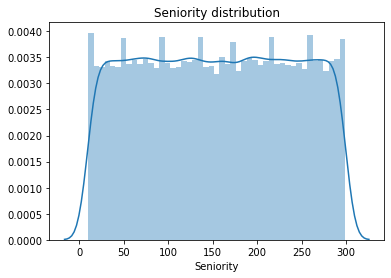

In [48]:
sns.distplot(df.Seniority)
plt.title("Seniority distribution")

Text(0.5, 1.0, 'Seniority distribution by target outcome')

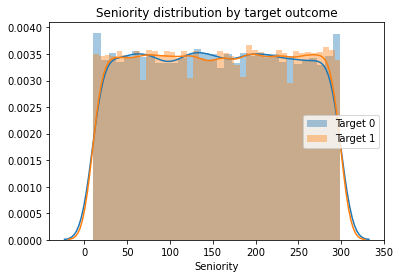

In [49]:
sns.distplot(df.loc[df.Target == 1].Seniority, label = "Target 0")
sns.distplot(df.loc[df.Target == 0].Seniority, label="Target 1")
plt.legend()
plt.title("Seniority distribution by target outcome")

seniority also doesn't seem to have an impact on the target outcome

In [25]:
#exploring the previously insured variable

In [50]:
df.Previously_Insured.value_counts()

No     65818
Yes    36533
Name: Previously_Insured, dtype: int64

In [51]:
df.groupby("Previously_Insured").Target.value_counts(normalize = True)

Previously_Insured  Target
No                  0         0.508174
                    1         0.491826
Yes                 0         0.997208
                    1         0.002792
Name: Target, dtype: float64

The "previously insured" variable seems relevant. If the answer is yes it seems certain that the person was not interested. For this reason we keep this variable

In [52]:
#exploring the vehicle damage variable

In [53]:
df.Vehicle_Damage.value_counts()

Yes    62546
No     39805
Name: Vehicle_Damage, dtype: int64

In [54]:
df.groupby("Vehicle_Damage").Target.value_counts(normalize = True)

Vehicle_Damage  Target
No              0         0.982791
                1         0.017209
Yes             1         0.508234
                0         0.491766
Name: Target, dtype: float64

The vehicle damage variable seems relevant too. For example if the answer is no it is almost certain that the target is 0. We keep this variable

In [55]:
df.groupby(["Previously_Insured", "Vehicle_Damage"]).Target.value_counts(normalize = True)
#putting together the previously insured variable and the vehicle damage variable

Previously_Insured  Vehicle_Damage  Target
No                  No              0         0.882331
                                    1         0.117669
                    Yes             1         0.525186
                                    0         0.474814
Yes                 No              0         0.998518
                                    1         0.001482
                    Yes             0         0.975898
                                    1         0.024102
Name: Target, dtype: float64

In [32]:
#exploring the vehicle age variable

In [56]:
df.Vehicle_Age.value_counts()

1-2 Year     58863
< 1 Year     37877
> 2 Years     5611
Name: Vehicle_Age, dtype: int64

In [57]:
df.groupby("Vehicle_Age").Target.value_counts(normalize = True)

Vehicle_Age  Target
1-2 Year     0         0.589980
             1         0.410020
< 1 Year     0         0.867228
             1         0.132772
> 2 Years    1         0.589734
             0         0.410266
Name: Target, dtype: float64

The vehicle age variable seems relevant too. In particular it is much more likely that those with a vehicle age lower than 1 are not interested. We keep this variable

In [35]:
#exploring the gender variable

In [58]:
df.Gender.value_counts()

Male      57097
Female    45254
Name: Gender, dtype: int64

In [59]:
df.groupby("Gender").Target.value_counts(normalize = True)

Gender  Target
Female  0         0.721704
        1         0.278296
Male    0         0.651838
        1         0.348162
Name: Target, dtype: float64

male seems just slightly more likely than women to accept the new product. (After running our algorithms both with and without the gender variable we didn't see any change in the results so we decided to discard this variable not providing better results)

In [38]:
#exploring the driving licence variable

In [39]:
df.groupby("Driving_License").Target.value_counts(normalize = True)

Driving_License  Target
0                0         0.682970
                 1         0.317030
1                0         0.682716
                 1         0.317284
Name: Target, dtype: float64

driving licence seems not relevant for predicting the target outcome. We discard this variable

In [40]:
#exploring the sales channel variables

we tested algorithm with and without ...no changes in results...so we remove it to simplify our model
reason behind the variable being not relevant in predicting the target outcome --> choice of getting insurance independent from channel


In [41]:
#exploring the region code variable

we tested algorithm with and without ...no changes in results...so we remove it to simplify our model
reasons for the variable being not relevant --> the choice of getting insured is not connected to the region but rather by the specific needs of the clients

### RELEVANT VARIABLES:
- Age
- Previously Insured
- Vehicle Damage
- Vehicle Age

# CONVERTING CATEGORICAL INTO NUMERIC

In [60]:
df["Prev_Insured_binary"] = df.Previously_Insured.apply(lambda x: 1 if (x == "Yes") else 0)
#creating a new (binary) column for the "previously insured" variable (1 = YES, 0 = NO)

In [61]:
df["Vehicle_damage_binary"] = df.Vehicle_Damage.apply(lambda x: 1 if (x == "Yes") else 0)
#creating a new (binary) column for the "vehicle damage" variable (1 = YES, 0 = NO)

In [62]:
dummy_Vehicle_Age = pd.get_dummies(df['Vehicle_Age'],drop_first=True)   
#creating dummies for the "Vehicle Age" variable (n-1 columns)

In [63]:
dummy_Vehicle_Age
#preview of the dummy variables

,< 1 Year,> 2 Years
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
102346,1,0
102347,0,0
102348,0,1
102349,1,0


In [64]:
new_df = pd.concat([df,dummy_Vehicle_Age], axis = 1)
#concatenating the dataset with the newly creating dummy variables in a new dataset

In [65]:
new_df.head()
#preview of the new dataframe

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target,Prev_Insured_binary,Vehicle_damage_binary,< 1 Year,> 2 Years
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0,0,1,0,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0,1,0,1,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0,0,1,0,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0,1,0,0,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0,0,1,0,0


In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_df['Age_scaled'] = scaler.fit_transform(new_df[["Age"]])

#we decided to scale the age variable (range 0-1)

In [67]:
new_df.drop(columns=["id", "Age","Gender", "Driving_License", "Licence_Type", "Region_Code", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage", "Annual_Premium", "Policy_Sales_Channel", "Seniority"], inplace=True)

#dropping unecessary columns

In [68]:
new_df.head()

#preview of the new dataframe

,Target,Prev_Insured_binary,Vehicle_damage_binary,< 1 Year,> 2 Years,Age_scaled
0,0,0,1,0,0,0.369231
1,0,1,0,1,0,0.046154
2,0,0,1,0,0,0.353846
3,0,1,0,0,0,0.615385
4,0,0,1,0,0,0.338462


In [69]:
Target_df = new_df.pop('Target') 
#dropping the column target and storing it in the "Taarget_df" variable

In [70]:
new_df["Target"] = Target_df
#adding the previously deleted target variable to the dataframe (in this way it will be added as the last column and will be useful when we will split the dataset in training and test)

In [71]:
new_df.head()

#preview of the final dataset. We will apply ML algorithms on this dataset

,Prev_Insured_binary,Vehicle_damage_binary,< 1 Year,> 2 Years,Age_scaled,Target
0,0,1,0,0,0.369231,0
1,1,0,1,0,0.046154,0
2,0,1,0,0,0.353846,0
3,1,0,0,0,0.615385,0
4,0,1,0,0,0.338462,0


Target
0    69878
1    32473
dtype: int64


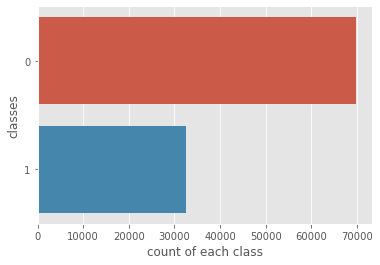

In [72]:
#Print class freq. through pandas 
print(new_df.groupby('Target').size())

plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=new_df.Target ,data=new_df)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

frequency of the 0 and 1 in the target variable

# ML ALGORITHM

here below the code of the algorithm with which we got the best F1

## DECISION TREE

In [73]:
#We separate X and y (the explanatory variables and target variable)
X = new_df.iloc[:,0:-1]
y = new_df.iloc[:,-1] 

In [74]:
#WE SPLIT DATA INTO TRAIN AND TEST SET
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30,
                                                    stratify=None, 
                                                    random_state= 123) 

print(X_train.shape, X_test.shape)

(71645, 5) (30706, 5)


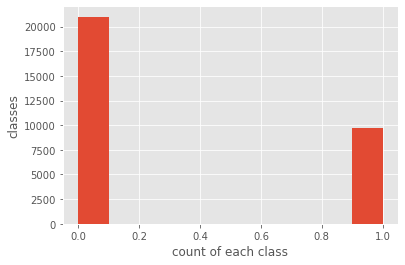

In [75]:
#Class Counts
plt.hist(y_test)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [76]:
#WE DEFINE OUR CLASSIFIER AND THE PARAMETERS GRID
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classifier = DecisionTreeClassifier(random_state=0)
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,5,10, 50],
              'min_samples_split': [5,10],
              'min_samples_leaf': [2,4]}

In [77]:
#WE DEFINE OUR GRIDSEARCH

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)

In [78]:
#WE TRAIN OUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  91 out of  96 | elapsed:    5.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    5.3s finished


In [79]:
#SUMMARY OF THE RESULTS OF THE GRIDSEARCH AND IDENTIFICATION WITH BEST PARAMETERS
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.691232 using {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.691232 (0.002177) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.691232 (0.002177) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.691232 (0.002177) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.691232 (0.002177) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.668694 (0.008648) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.668694 (0.008648) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.668694 (0.008648) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.668694 (0.008648) with: {'criterion': 'entropy', 'max_dep

In [80]:
#WE TEST THE MODEL ON TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

In [81]:
#Prediction on the TEST SET of our model
y_pred

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [82]:
#WE EVALUATE PREDICTION (F1 SCORE IS COMPUTED FOR BOTH THE TRAIN AND THE TEST SET)
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6912335276120806
--
***RESULTS ON TEST SET***
f1_score:  0.6910213738621327


In [83]:
#WE COMPUTE SOME FURTHER METRICS (in particular the F1 for both 0 and 1)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79     21001
           1       0.57      0.89      0.69      9705

    accuracy                           0.75     30706
   macro avg       0.75      0.79      0.74     30706
weighted avg       0.81      0.75      0.76     30706



In [84]:
#CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[14385  6616]
 [ 1089  8616]]


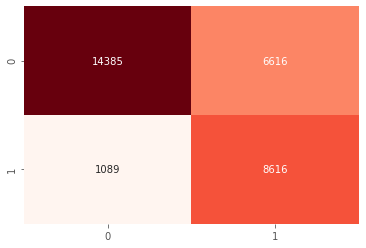

In [85]:
# Confusion matrix (heatmap version)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);


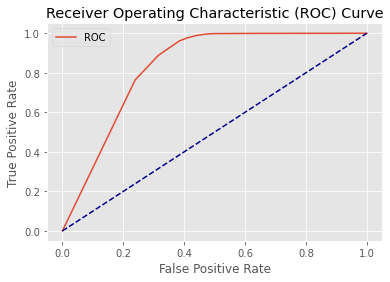

AUC: 0.83


In [86]:
#ROC CURVE

from sklearn import metrics
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4, min_samples_split=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

In [87]:
#COLUMNS OF THE DATASET

X_train.columns.tolist()

['Prev_Insured_binary',
 'Vehicle_damage_binary',
 '< 1 Year',
 '> 2 Years',
 'Age_scaled']

In [88]:
#GRAPHICAL REPRESENTATION OF THE TREE

from sklearn import tree
r = tree.export_text(model,feature_names=X_test.columns.tolist())
print(r)

|--- Prev_Insured_binary <= 0.50
|   |--- Vehicle_damage_binary <= 0.50
|   |   |--- Age_scaled <= 0.59
|   |   |   |--- < 1 Year <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- < 1 Year >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Age_scaled >  0.59
|   |   |   |--- Age_scaled <= 0.81
|   |   |   |   |--- class: 0
|   |   |   |--- Age_scaled >  0.81
|   |   |   |   |--- class: 0
|   |--- Vehicle_damage_binary >  0.50
|   |   |--- Age_scaled <= 0.10
|   |   |   |--- Age_scaled <= 0.02
|   |   |   |   |--- class: 0
|   |   |   |--- Age_scaled >  0.02
|   |   |   |   |--- class: 0
|   |   |--- Age_scaled >  0.10
|   |   |   |--- Age_scaled <= 0.58
|   |   |   |   |--- class: 1
|   |   |   |--- Age_scaled >  0.58
|   |   |   |   |--- class: 0
|--- Prev_Insured_binary >  0.50
|   |--- Vehicle_damage_binary <= 0.50
|   |   |--- Age_scaled <= 0.62
|   |   |   |--- Age_scaled <= 0.19
|   |   |   |   |--- class: 0
|   |   |   |--- Age_scaled >  0.19
|   |   |   |   |--- class: 0
|